# Import the data located at this link. It has information on people infected with dengue at the district level for 2015 to 2021.


In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet

In [2]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

In [3]:
#Import the data
data = pd.read_csv(r"../_data/data_dengue_peru.csv")
data

C:\Users\JUANKY\AppData\Local\Temp\ipykernel_19920\1373074699.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"../_data/data_dengue_peru.csv")


,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


In [4]:
#Replace Null values with 0 in order to change the type value from 'Casos'
data['Casos'] = data['Casos'].fillna(0)
data

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,0
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,0
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,0
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,0
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,0
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,0


In [5]:
#Check type value
data.dtypes

Año                 int64
Semana              int64
Eventos o daños    object
Departamento       object
Distrito           object
Provincia          object
Ubigeo              int64
Casos              object
dtype: object

In [6]:
#Change the type value from 'Casos'
data['Casos'] = data['Casos'].str.replace(',','').astype(float)

In [7]:
data.dtypes

Año                  int64
Semana               int64
Eventos o daños     object
Departamento        object
Distrito            object
Provincia           object
Ubigeo               int64
Casos              float64
dtype: object

In [8]:
#Eliminate the unnecesary columns
data2= data[["Año", "Departamento", "Distrito", "Provincia", "Ubigeo", "Casos"]]
data2

,Año,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,CUSCO,MEGANTONI,LA CONVENCION,80914,NaN
1,2021,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,CUSCO,MEGANTONI,LA CONVENCION,80914,NaN
4,2020,CUSCO,MEGANTONI,LA CONVENCION,80914,NaN
...,...,...,...,...,...,...
172139,2021,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


In [9]:
#Group by the previous dataframe
data_2 = data2.groupby( ['Año', 'Departamento', 'Provincia', 'Distrito', 'Ubigeo'], as_index = False )[['Casos']].sum()
data_2

,Año,Departamento,Provincia,Distrito,Ubigeo,Casos
0,2015,AMAZONAS,BAGUA,ARAMANGO,10202,0.0
1,2015,AMAZONAS,BAGUA,BAGUA,10201,7.0
2,2015,AMAZONAS,BAGUA,COPALLIN,10203,0.0
3,2015,AMAZONAS,BAGUA,EL PARCO,10204,0.0
4,2015,AMAZONAS,BAGUA,IMAZA,10205,1.0
...,...,...,...,...,...,...
3243,2021,UCAYALI,PADRE ABAD,CURIMANA,250303,22.0
3244,2021,UCAYALI,PADRE ABAD,IRAZOLA,250302,19.0
3245,2021,UCAYALI,PADRE ABAD,NESHUYA,250304,11.0
3246,2021,UCAYALI,PADRE ABAD,PADRE ABAD,250301,68.0


In [10]:
#df = data.groupby(['Año','Ubigeo', 'Departamento', 'Provincia', 'Distrito'])['Casos'].agg('sum')

# Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: Use this code.

In [11]:
#Create a special UBIGEO for Departments
data_2['UBIGEO_DEP'] = data_2['Ubigeo'].astype(str).str[0:2]
data_2

,Año,Departamento,Provincia,Distrito,Ubigeo,Casos,UBIGEO_DEP
0,2015,AMAZONAS,BAGUA,ARAMANGO,10202,0.0,10
1,2015,AMAZONAS,BAGUA,BAGUA,10201,7.0,10
2,2015,AMAZONAS,BAGUA,COPALLIN,10203,0.0,10
3,2015,AMAZONAS,BAGUA,EL PARCO,10204,0.0,10
4,2015,AMAZONAS,BAGUA,IMAZA,10205,1.0,10
...,...,...,...,...,...,...,...
3243,2021,UCAYALI,PADRE ABAD,CURIMANA,250303,22.0,25
3244,2021,UCAYALI,PADRE ABAD,IRAZOLA,250302,19.0,25
3245,2021,UCAYALI,PADRE ABAD,NESHUYA,250304,11.0,25
3246,2021,UCAYALI,PADRE ABAD,PADRE ABAD,250301,68.0,25


In [12]:
#Create a special UBIGEO for Provinces
data_2['UBIGEO_PRO'] = data['Ubigeo'].astype(str).str[0:4]
data_2

,Año,Departamento,Provincia,Distrito,Ubigeo,Casos,UBIGEO_DEP,UBIGEO_PRO
0,2015,AMAZONAS,BAGUA,ARAMANGO,10202,0.0,10,8091
1,2015,AMAZONAS,BAGUA,BAGUA,10201,7.0,10,1801
2,2015,AMAZONAS,BAGUA,COPALLIN,10203,0.0,10,1801
3,2015,AMAZONAS,BAGUA,EL PARCO,10204,0.0,10,8091
4,2015,AMAZONAS,BAGUA,IMAZA,10205,1.0,10,8091
...,...,...,...,...,...,...,...,...
3243,2021,UCAYALI,PADRE ABAD,CURIMANA,250303,22.0,25,1501
3244,2021,UCAYALI,PADRE ABAD,IRAZOLA,250302,19.0,25,1501
3245,2021,UCAYALI,PADRE ABAD,NESHUYA,250304,11.0,25,1501
3246,2021,UCAYALI,PADRE ABAD,PADRE ABAD,250301,68.0,25,1501


In [13]:
#data['Casos'] = data['Casos'].fillna(0)

In [14]:
#data["Casos"] = pd.to_numeric(data["Casos"])

In [15]:
#data['Casos'] = data['Casos'].str.replace(',','')

In [16]:
#data["Casos"] = pd.to_numeric(data["Casos"])

In [17]:
data.dtypes

Año                  int64
Semana               int64
Eventos o daños     object
Departamento        object
Distrito            object
Provincia           object
Ubigeo               int64
Casos              float64
dtype: object

# Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.


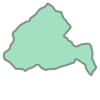

In [18]:
#Import Shapefile
maps = gpd.read_file(r'../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')
maps["geometry"][0]

In [19]:
maps

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19,CHACHAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24,CHILCAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,58,CHOCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,25,HUANCARQUI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [20]:
#Check unique values (from identifiers for the districts)

maps['UBIGEO'].is_unique #It's true

maps['UBIGEO'].unique().size

1874

In [21]:
#We filter the Shape file by UBIGEO and geometry
maps = maps[['UBIGEO', 'geometry']]
maps = maps.rename({'UBIGEO':'Ubigeo'}, axis =1 )
maps 

,Ubigeo,geometry
0,060504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...
1869,040404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,040405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,040406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,040407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [22]:
#We analyze if UBIGEO is a int value or not
maps.dtypes 

Ubigeo        object
geometry    geometry
dtype: object

In [23]:
# First change from Object to string, after that, to int

maps['Ubigeo'] = maps['Ubigeo'].astype(str).astype(int)
maps

,Ubigeo,geometry
0,60504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,61105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,61109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,61110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,61203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...
1869,40404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,40405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,40406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,40407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [24]:
# Analyze which longitud-latitud projection is
maps.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
# Merge using inner way to drop missing values 

dataset = pd.merge(maps, data_2, how="inner", on="Ubigeo")
dataset

,Ubigeo,geometry,Año,Departamento,Provincia,Distrito,Casos,UBIGEO_DEP,UBIGEO_PRO
0,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2015,LAMBAYEQUE,CHICLAYO,LA VICTORIA,0.0,14,1105
1,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2016,LAMBAYEQUE,CHICLAYO,LA VICTORIA,0.0,14,2006
2,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2017,LAMBAYEQUE,CHICLAYO,LA VICTORIA,148.0,14,2006
3,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2018,LAMBAYEQUE,CHICLAYO,LA VICTORIA,0.0,14,1020
4,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2019,LAMBAYEQUE,CHICLAYO,LA VICTORIA,0.0,14,2001
...,...,...,...,...,...,...,...,...,...
3243,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2017,JUNIN,SATIPO,MAZAMARI,7.0,12,1020
3244,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2018,JUNIN,SATIPO,MAZAMARI,0.0,12,2203
3245,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2019,JUNIN,SATIPO,MAZAMARI,0.0,12,1801
3246,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2020,JUNIN,SATIPO,MAZAMARI,0.0,12,8091


In [26]:
# Function to filter dataset_dengue by year and administrative space(province)

def subdata( a, b):
    
    if b == "All-Peru":
        
        resultado = dataset.loc[(dataset['Año']== a)]
    else:
        resultado = dataset.loc[(dataset['Año']== a) & (dataset['Provincia']== b)]
    return resultado  

#2 arguments: Year and Location

In [27]:
#Select one criteria: All Peru 2021

dataset_2021 = subdata( 2021 , "All-Peru")

In [28]:
#filtered_1=dataset['Año']==2021
#dataset_2021 = dataset[filtered_1]
#dataset_2021
dataset_2021

,Ubigeo,geometry,Año,Departamento,Provincia,Distrito,Casos,UBIGEO_DEP,UBIGEO_PRO
6,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,LAMBAYEQUE,CHICLAYO,LA VICTORIA,0.0,14,1903
13,140107,"POLYGON ((-79.66093 -6.90007, -79.65973 -6.900...",2021,LAMBAYEQUE,CHICLAYO,LAGUNAS,0.0,14,8091
20,140108,"POLYGON ((-79.78014 -6.82123, -79.77781 -6.821...",2021,LAMBAYEQUE,CHICLAYO,MONSEFU,0.0,14,8091
27,140115,"POLYGON ((-79.58359 -6.77662, -79.58181 -6.777...",2021,LAMBAYEQUE,CHICLAYO,SAÑA,0.0,14,8091
34,140116,"POLYGON ((-79.44482 -6.82277, -79.44371 -6.823...",2021,LAMBAYEQUE,CHICLAYO,CAYALTI,0.0,14,1903
...,...,...,...,...,...,...,...,...,...
3219,250106,"POLYGON ((-75.02339 -7.95777, -75.01596 -7.965...",2021,UCAYALI,CORONEL PORTILLO,NUEVA REQUENA,10.0,25,1501
3226,10707,"POLYGON ((-78.47479 -5.93642, -78.47356 -5.937...",2021,AMAZONAS,UTCUBAMBA,YAMON,0.0,10,2403
3233,10705,"POLYGON ((-78.29526 -5.81005, -78.29476 -5.810...",2021,AMAZONAS,UTCUBAMBA,JAMALCA,3.0,10,2403
3240,10203,"POLYGON ((-78.32548 -5.56151, -78.32598 -5.562...",2021,AMAZONAS,BAGUA,COPALLIN,28.0,10,2206


In [29]:
dataset_2021.dtypes

Ubigeo             int32
geometry        geometry
Año                int64
Departamento      object
Provincia         object
Distrito          object
Casos            float64
UBIGEO_DEP        object
UBIGEO_PRO        object
dtype: object

<AxesSubplot:>

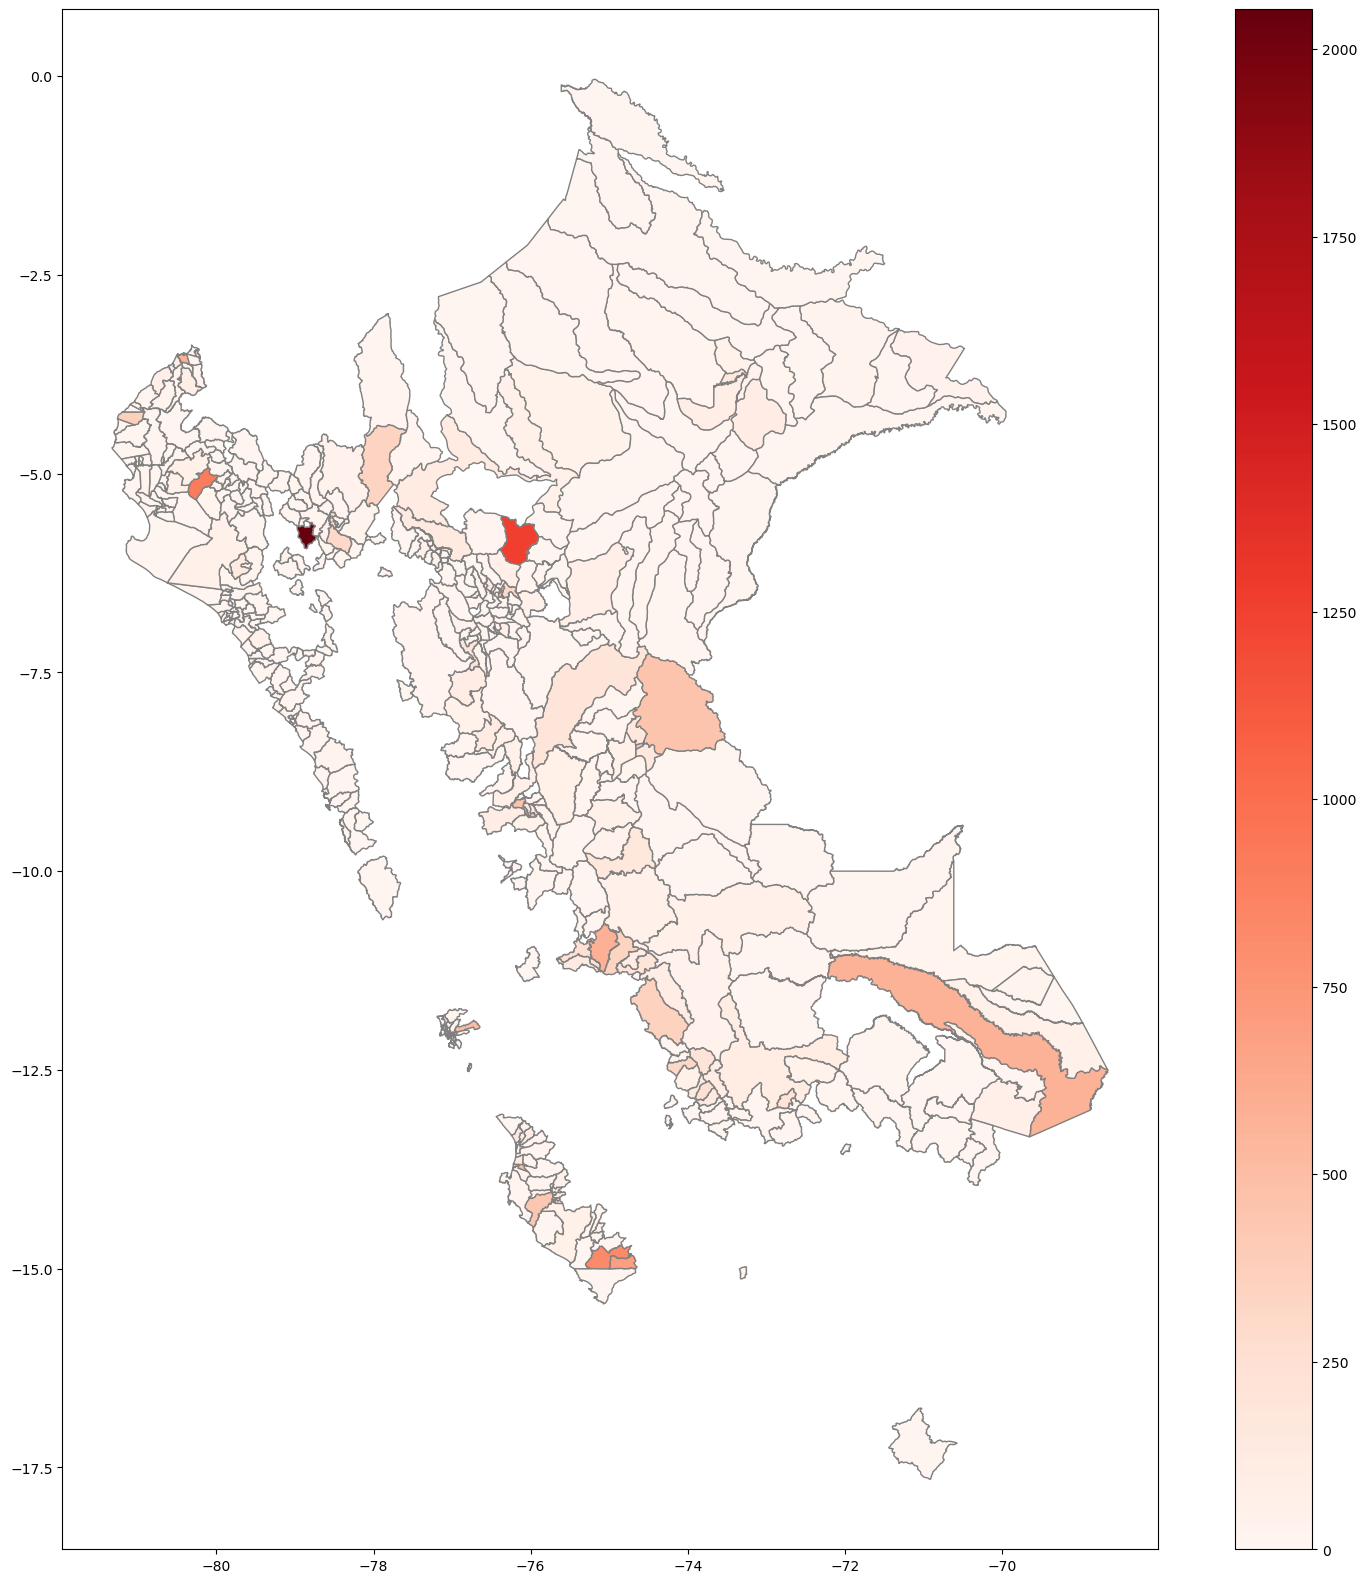

In [30]:
#Plot this first graph in order to use the argument 'cmap'
dataset_2021.plot( column='Casos', cmap='Reds', 
         figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          legend = True )

In [31]:
# Inverting colour map
cmap = plt.cm.OrRd

<AxesSubplot:>

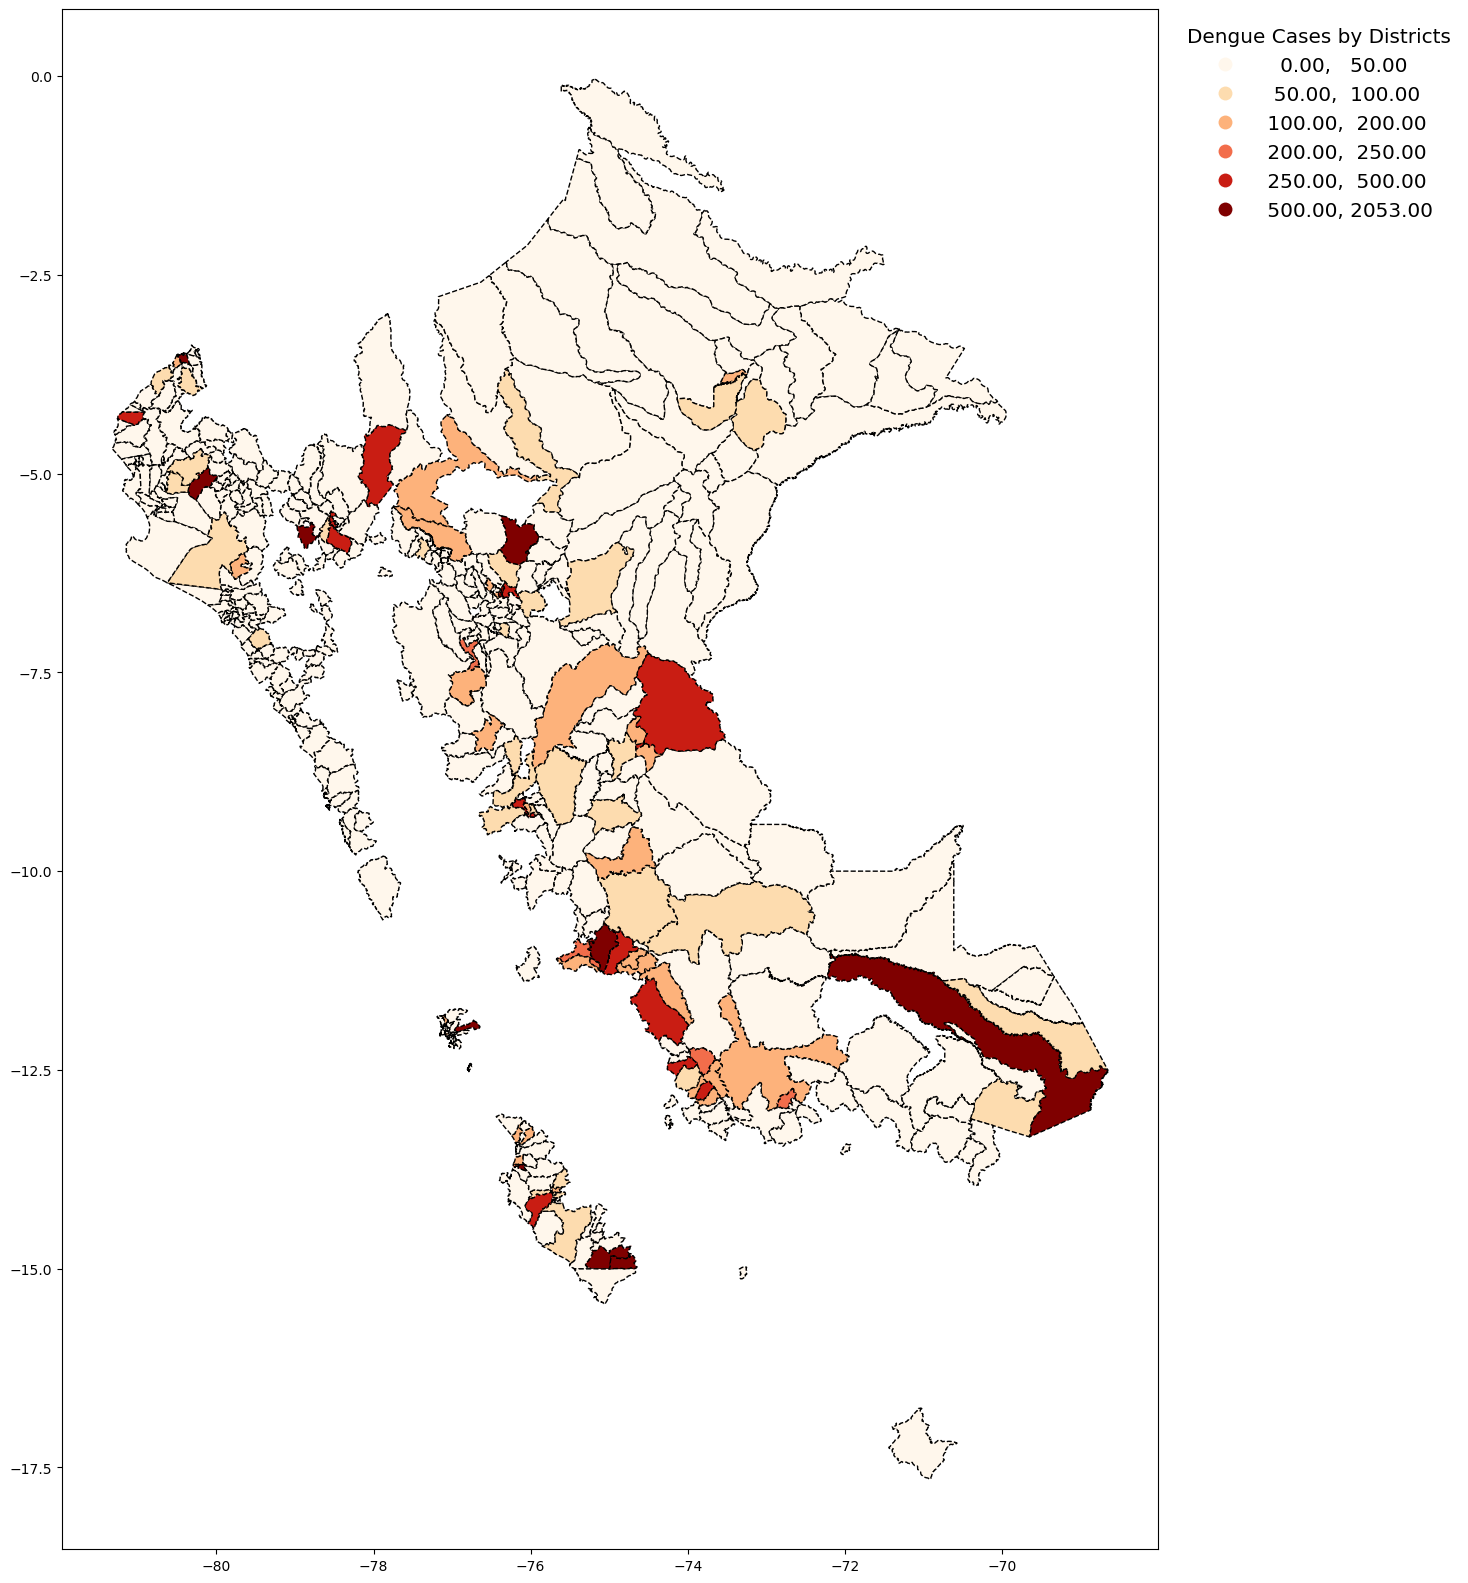

In [32]:
#Final graph for this 3rd question
fig, ax = plt.subplots(figsize=(20, 20))
dataset_2021.plot( ax = ax, 
        column='Casos', 
         cmap= cmap, 
        figsize=(20, 20), 
         linestyle='--',
         edgecolor='black', 
         legend = True,  
         scheme = "User_Defined", 
         classification_kwds = dict( bins = [ 50, 100, 200, 250,  500 ] ), 
         legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Dengue Cases by Districts", 
                            title_fontsize = 'x-large', 
                            frameon= False )
        )